In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sbn
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
import folium
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition   import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('Electric_Vehicle_Population_Data_20231030.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153830 entries, 0 to 153829
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         153830 non-null  object 
 1   County                                             153827 non-null  object 
 2   City                                               153827 non-null  object 
 3   State                                              153830 non-null  object 
 4   Postal Code                                        153827 non-null  float64
 5   Model Year                                         153830 non-null  int64  
 6   Make                                               153830 non-null  object 
 7   Model                                              153830 non-null  object 
 8   Electric Vehicle Type                              153830 non-null  object

## Reprocessing

In [4]:
data['Postal Code'] = data['Postal Code'].astype(object)
data['Legislative District'] = data['Legislative District'].astype(object)
data['DOL Vehicle ID'] = data['DOL Vehicle ID'].astype(object)
data['2020 Census Tract'] = data['2020 Census Tract'].astype(object)

In [5]:
data.describe()

,Model Year,Electric Range,Base MSRP
count,153830.000000,153830.000000,153830.000000
mean,2020.100780,65.727673,1273.032276
std,3.019617,95.147219,9086.044139
min,1997.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000
50%,2021.000000,17.000000,0.000000
75%,2023.000000,84.000000,0.000000
max,2024.000000,337.000000,845000.000000


In [6]:
data.describe()

,Model Year,Electric Range,Base MSRP
count,153830.000000,153830.000000,153830.000000
mean,2020.100780,65.727673,1273.032276
std,3.019617,95.147219,9086.044139
min,1997.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000
50%,2021.000000,17.000000,0.000000
75%,2023.000000,84.000000,0.000000
max,2024.000000,337.000000,845000.000000


In [7]:
print(data.isnull().sum())

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 339
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [9]:
print(data['State'].drop_duplicates().tolist())

['WA', 'BC', 'IN', 'NH', 'VA', 'NC', 'GA', 'CA', 'NE', 'CO', 'NY', 'MD', 'DC', 'AL', 'LA', 'IL', 'TX', 'FL', 'AZ', 'OH', 'HI', 'CT', 'MA', 'OR', 'NJ', 'IA', 'SC', 'AR', 'ID', 'NV', 'OK', 'MN', 'UT', 'AP', 'AK', 'KY', 'MO', 'PA', 'MT', 'KS', 'WY', 'MS', 'DE']


In [10]:
print(len(data[data['State'] == 'WA']))
print(len(data))

153491
153830


In [11]:
data = data.loc[data['State'] == 'WA']
print(len(data))

153491


In [12]:
data = data.dropna()
print(len(data))

153487


In [13]:
print(data.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [14]:
def boxplot(list_columns_int_data, data_input):
    print(list_columns_int_data)
    for i in list_columns_int_data:
        plt.figure(figsize=(6, 6))
        sns.boxplot(data=data_input[i])
        plt.title('Biểu đồ boxplot cho '+ i)
        plt.xlabel(i)
        plt.ylabel('value')
        plt.show()

['Electric Range']


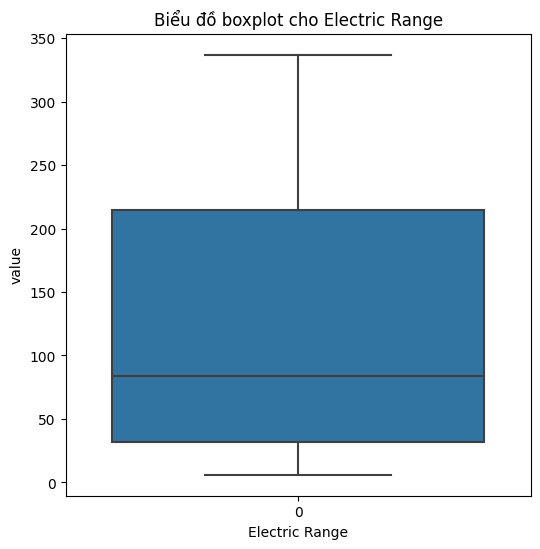

In [15]:
boxplot(['Electric Range'], data[data['Electric Range'] != 0])

['Electric Range']


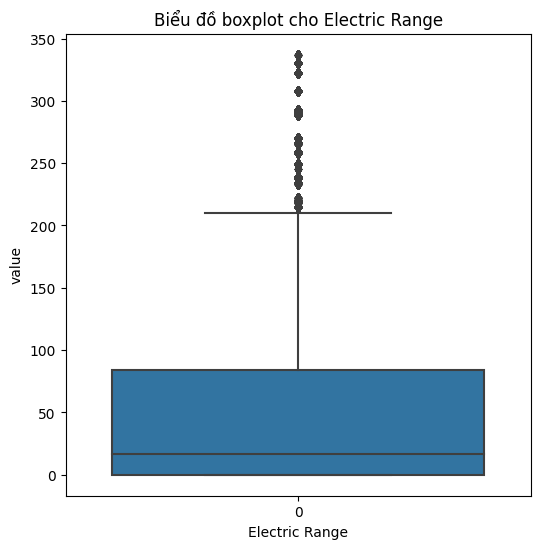

In [16]:
boxplot(['Electric Range'], data[data['Electric Range'] > -1])

['Base MSRP']


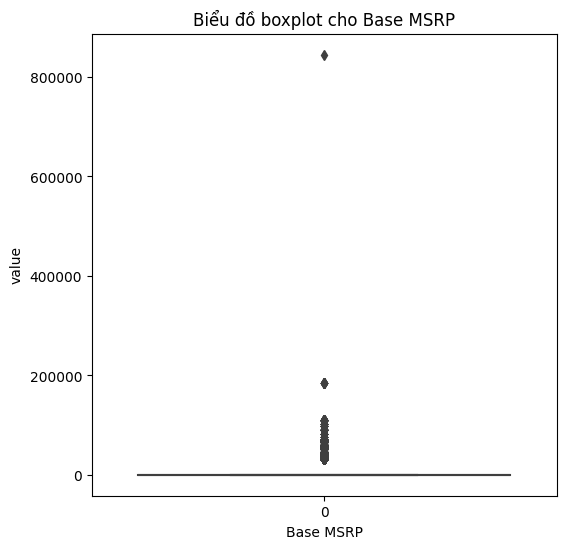

In [17]:
boxplot(['Base MSRP'], data[data['Base MSRP'] > -1])

In [18]:
phan_tach = data['Vehicle Location'].str.replace('POINT ', '')
phan_tach = phan_tach.str.replace('(', '')
phan_tach = phan_tach.str.replace(')', '')
data[['Longitude', 'Latitude']] = phan_tach.str.split(' ', 1, expand=True)
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Longitude,Latitude
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,53077002803.0,-120.477805,46.553505
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033004902.0,-122.34301,47.659185
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033020100.0,-122.382425,47.77279
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,53029971100.0,-122.6880708,48.2179983
5,1G1FW6S00H,Kitsap,Seabeck,WA,98380.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,35.0,125032974,POINT (-122.847462 47.63836),PUGET SOUND ENERGY INC,53035091301.0,-122.847462,47.63836


In [19]:
data[['Longitude', 'Latitude']] = data[['Longitude', 'Latitude']].astype(float)

In [20]:
data.loc[data['Base MSRP'] != 0, 'Binary Base MSRP'] = '1'
data.loc[data['Base MSRP'] == 0, 'Binary Base MSRP'] = '0'

In [21]:
county_city_by_postal = data.groupby(['Postal Code', 'County', 'City']).size().reset_index(name='Number of Cars')
car_count_by_postal_code = data['Postal Code'].value_counts().reset_index()
car_count_by_postal_code.columns = ['Postal Code', 'Number of Cars']
unique_county_city_by_postal = county_city_by_postal.groupby('Postal Code').first().reset_index()
combined_data = pd.merge(car_count_by_postal_code, unique_county_city_by_postal, on='Postal Code')
fig = px.choropleth_mapbox(combined_data, 
                           geojson="https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json", 
                           locations='Postal Code', 
                           featureidkey="properties.ZCTA5CE10",
                           color='County',  
                           color_discrete_sequence=px.colors.qualitative.Set1, 
                           mapbox_style="carto-positron",
                           zoom=5, 
                           center={"lat": 47.7511, "lon": -120.7401},
                           opacity=0.5
                          )

fig.update_layout(title_text='County in Dataset ')

## EDA

### 4.1. 

In [22]:
count_vehicle = data['DOL Vehicle ID'].count()
print(f'Số lượng xe điện được đăng ký ở bang Washington: {count_vehicle}')

Số lượng xe điện được đăng ký ở bang Washington: 153487


### 4.2.

In [23]:
data_wa = data[data['State']=="WA"]
evt_count = data_wa['Electric Vehicle Type'].value_counts()
evt_count

Battery Electric Vehicle (BEV)            119173
Plug-in Hybrid Electric Vehicle (PHEV)     34314
Name: Electric Vehicle Type, dtype: int64

### 4.3.

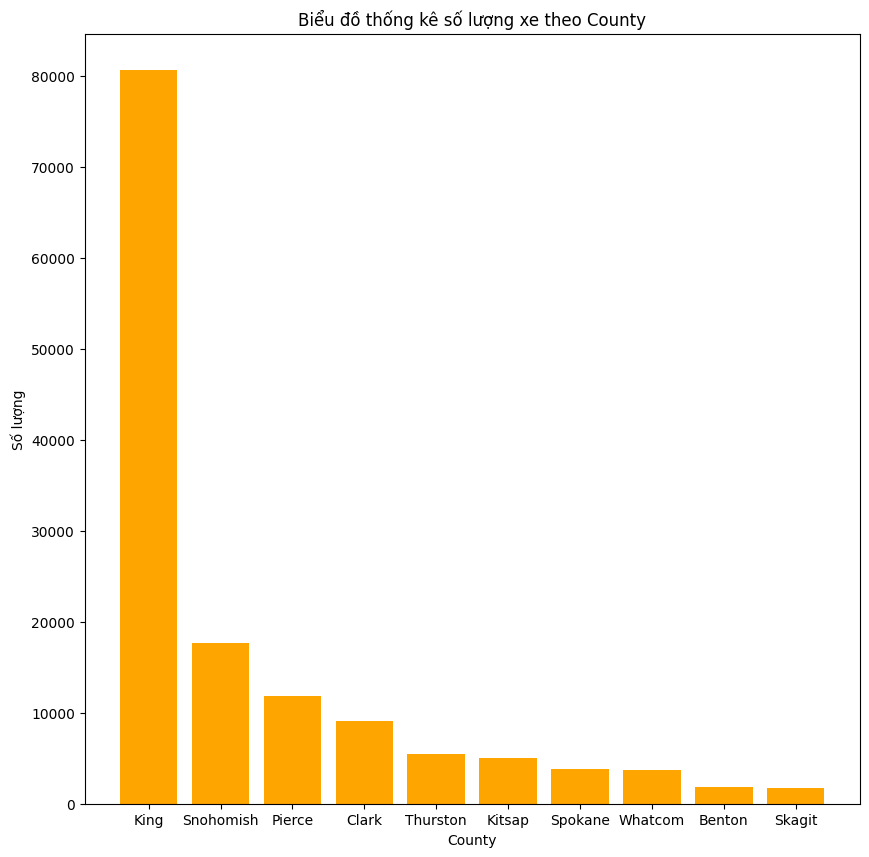

In [24]:
sl_xe = data.groupby('County').size().reset_index(name='Counts')
sl_xe = sl_xe.sort_values(by='Counts', ascending=False)
plt.figure(figsize = (10,10))
plt.bar(sl_xe['County'][:10], sl_xe['Counts'][:10], color = 'orange')
plt.xlabel('County')
plt.ylabel('Số lượng')
plt.title('Biểu đồ thống kê số lượng xe theo County')
plt.show()

### 4.4. 

In [25]:
count_data_wa = data_wa.groupby(["Model Year", "Electric Vehicle Type"]).size().reset_index(name = "Count")
count_data_wa = count_data_wa[count_data_wa["Model Year"] != 2024]
count_data_wa.head()

,Model Year,Electric Vehicle Type,Count
0,1997,Battery Electric Vehicle (BEV),1
1,1998,Battery Electric Vehicle (BEV),1
2,1999,Battery Electric Vehicle (BEV),3
3,2000,Battery Electric Vehicle (BEV),8
4,2002,Battery Electric Vehicle (BEV),2


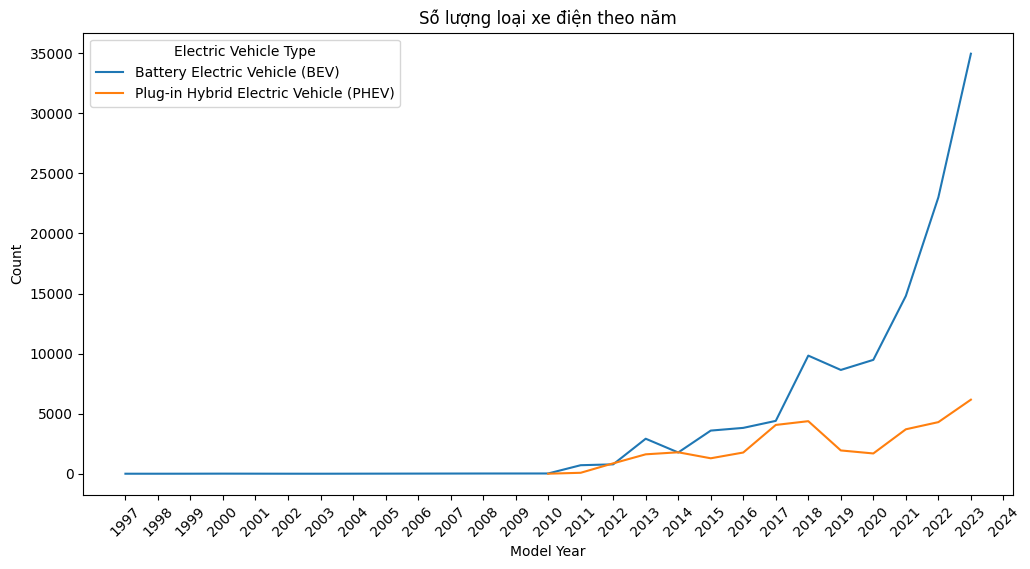

In [26]:
plt.figure(figsize = (12,6))
evt_chart = sns.lineplot(data = count_data_wa, x = "Model Year", y = "Count", hue = "Electric Vehicle Type")

plt.title("Số lượng loại xe điện theo năm")
plt.xticks(rotation = 45)
evt_chart.set_xticks(range(1997, 2025), labels = range(1997, 2025))
evt_chart.set_xlabel("Model Year")
evt_chart.legend(title="Electric Vehicle Type")

plt.show()

### 4.5.

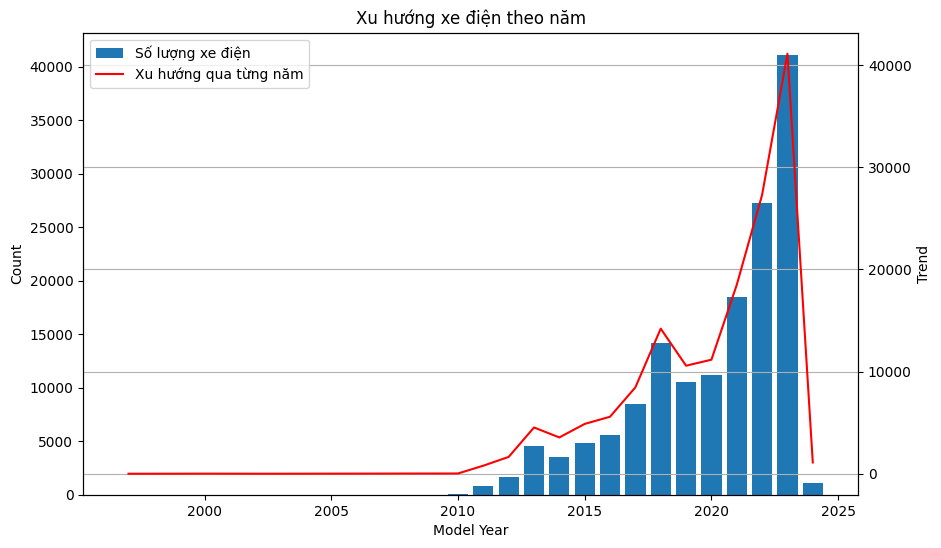

In [27]:
plt.figure(figsize=(10, 6))
ax1 = plt.gca()
model_years = data["Model Year"].value_counts().sort_index()
# Biểu đồ cột
ax1.bar(model_years.index, model_years.values, label='Số lượng xe điện')

ax1.set_xlabel("Model Year")
ax1.set_ylabel("Count")
ax1.set_title("Xu hướng xe điện theo năm")

ax2 = ax1.twinx()

ax2.plot(model_years.index, model_years.values, linestyle='-', color='red', label='Xu hướng qua từng năm')
ax2.set_ylabel("Trend")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

plt.grid()
plt.show()

### 4.6.

In [28]:
county_city_by_postal = data.groupby(['Postal Code', 'County', 'City']).size().reset_index(name='Number of Cars')
car_count_by_postal_code = data['Postal Code'].value_counts().reset_index()
car_count_by_postal_code.columns = ['Postal Code', 'Number of Cars']
unique_county_city_by_postal = county_city_by_postal.groupby('Postal Code').first().reset_index()

unique_county_city_by_postal = unique_county_city_by_postal.rename(columns={'Number of Cars': 'City Cars'})

combined_data = pd.merge(car_count_by_postal_code, unique_county_city_by_postal, on='Postal Code')

fig = px.choropleth_mapbox(combined_data, 
                           geojson="https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json", 
                           locations='Postal Code', 
                           featureidkey="properties.ZCTA5CE10",
                           color='City Cars',  
                           color_continuous_scale="Viridis",  
                           mapbox_style="carto-positron",
                           zoom=5, 
                           center={"lat": 47.7511, "lon": -120.7401},
                           opacity=0.5,
                           hover_name="City"
                          )

fig.update_layout(title_text='Number of Cars by City')
fig.update_layout(height=650, width=1000)
fig.show()

### 4.7.

In [29]:
island_county_data = data[data['County'].str.strip() == 'Island']

island_county_data[['County', 'City', 'Longitude', 'Latitude']]
map_island_county = folium.Map(location=[island_county_data['Latitude'].mean(), island_county_data['Longitude'].mean()], zoom_start=10)

for index, row in island_county_data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['City']).add_to(map_island_county)

map_island_county

### 4.8. 

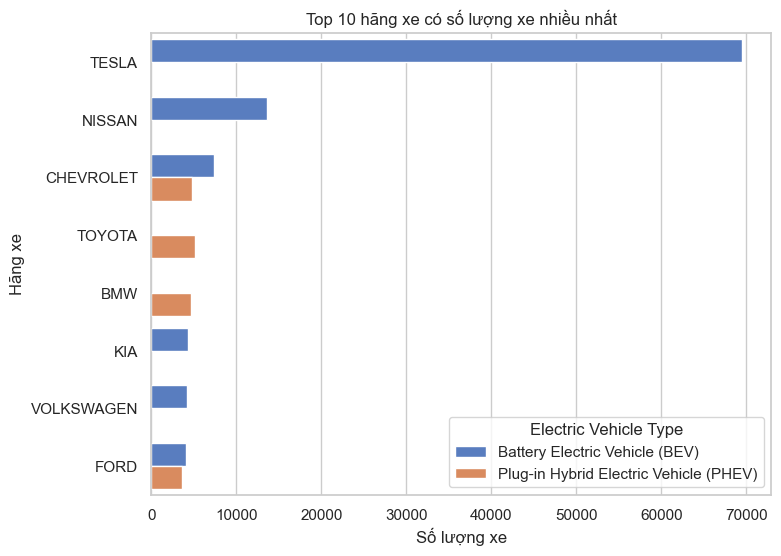

In [30]:
grouped_data = data.groupby(['Electric Vehicle Type', 'Make']).size().reset_index(name='Count')

top_10_clusters = grouped_data.sort_values(by='Count', ascending=False).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Count', y='Make', hue='Electric Vehicle Type', data=top_10_clusters, palette='muted')

plt.xlabel('Số lượng xe')
plt.ylabel('Hãng xe')
plt.title('Top 10 hãng xe có số lượng xe nhiều nhất')
plt.gcf().set_size_inches(8, 6)
plt.show()

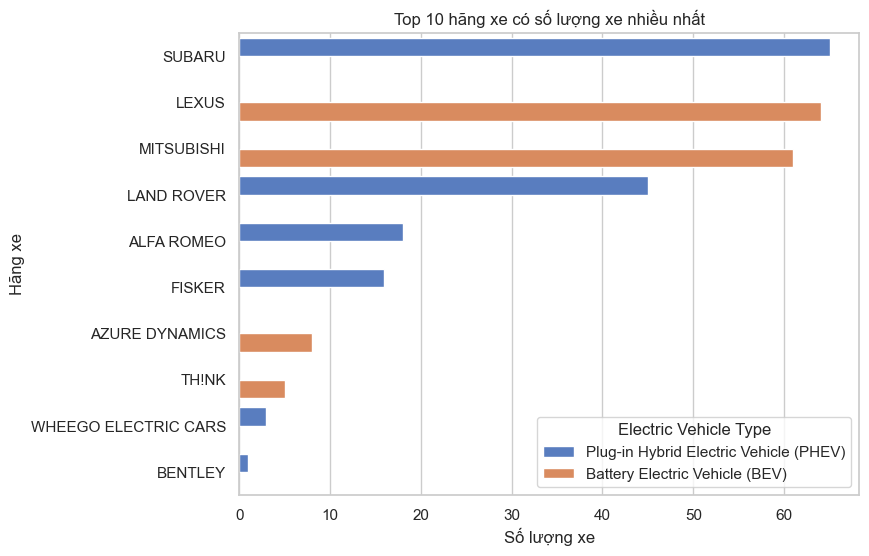

In [31]:
grouped_data = data.groupby(['Electric Vehicle Type', 'Make']).size().reset_index(name='Count')

top_10_clusters = grouped_data.sort_values(by='Count', ascending=False).tail(10)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Count', y='Make', hue='Electric Vehicle Type', data=top_10_clusters, palette='muted')

plt.xlabel('Số lượng xe')
plt.ylabel('Hãng xe')
plt.title('Top 10 hãng xe có số lượng xe nhiều nhất')
plt.gcf().set_size_inches(8, 6)
plt.show()

### 4.9. 

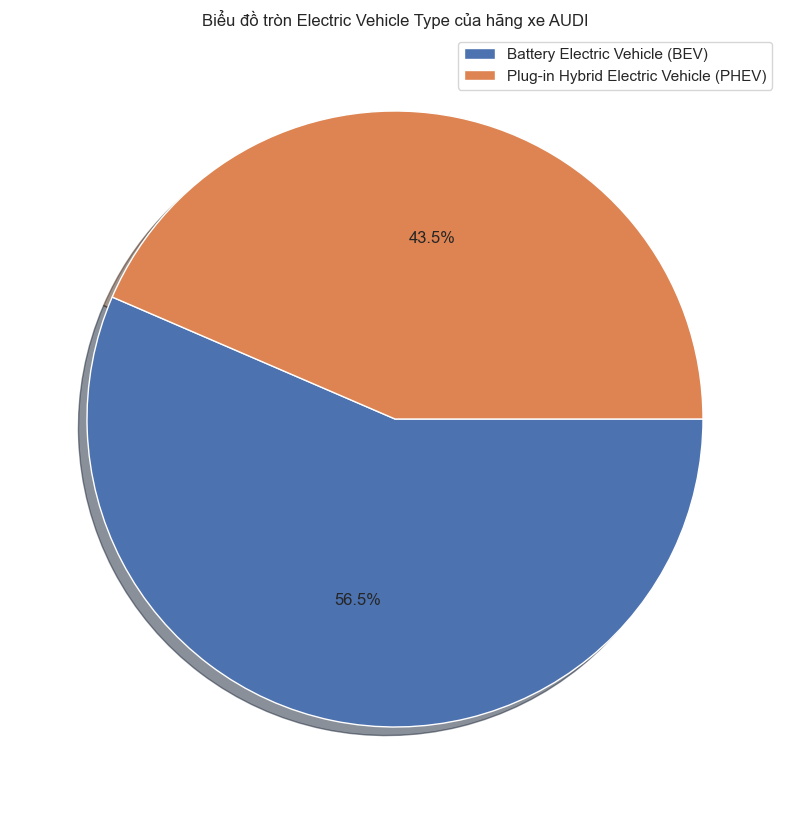

In [32]:
Electric_Vehicle_Type = data.groupby(by = ['Make', 'Electric Vehicle Type']).size().reset_index(name='Counts')
plt.figure(figsize=(10, 10))
plt.pie(Electric_Vehicle_Type[Electric_Vehicle_Type['Make'] == 'AUDI']['Counts'], autopct='%1.1f%%', shadow = True, counterclock = False)
plt.title("Biểu đồ tròn Electric Vehicle Type của hãng xe AUDI")
plt.legend(labels = Electric_Vehicle_Type[Electric_Vehicle_Type['Make'] == 'AUDI']['Electric Vehicle Type'])
plt.show()

### 4.10. 

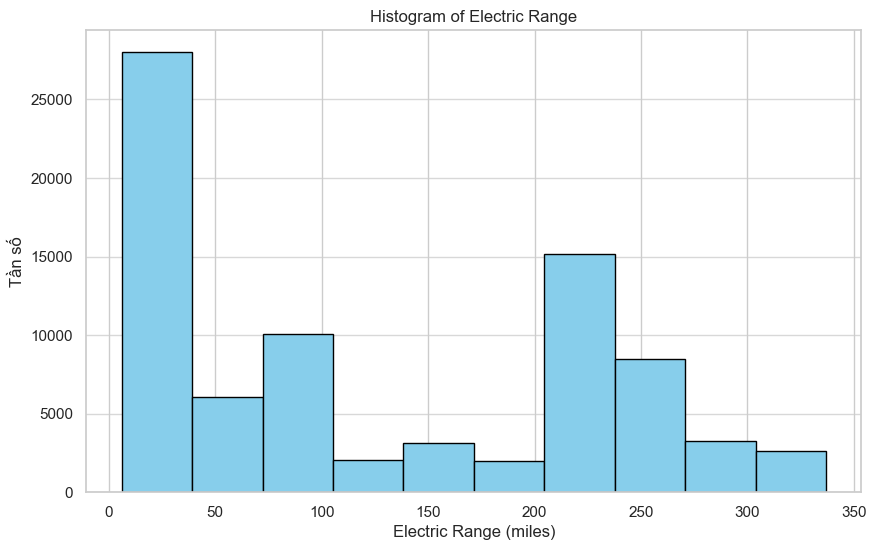

In [33]:
electric_range = data[data['Electric Range'] != 0]['Electric Range']

plt.figure(figsize=(10, 6))
plt.hist(electric_range, bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Electric Range (miles)')
plt.ylabel('Tần số')
plt.title('Histogram of Electric Range')

plt.grid(axis='y', alpha=0.75)
plt.show()

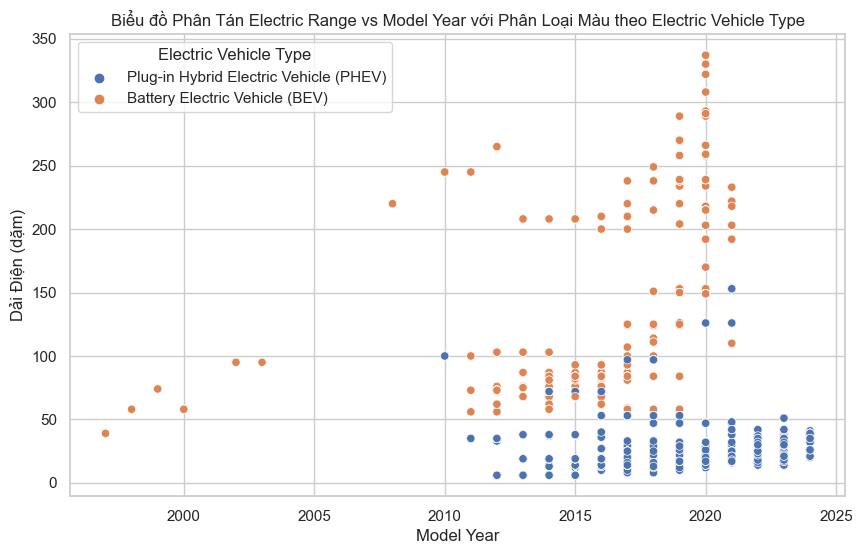

In [34]:
filtered_data = data[data['Electric Range'] != 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model Year', y='Electric Range', hue='Electric Vehicle Type', data=filtered_data)

plt.xlabel('Model Year')
plt.ylabel('Dải Điện (dặm)')
plt.title('Biểu đồ Phân Tán Electric Range vs Model Year với Phân Loại Màu theo Electric Vehicle Type')

plt.grid(True)
plt.legend(title='Electric Vehicle Type')
plt.show()

### 4.11.

In [35]:
data = data[data['Electric Range'] != 0]
model_s_data = data[data['Model'] == 'MODEL S']

# Nhóm các bản ghi theo model year và lấy ra electric range cao nhất
model_s_top_range = model_s_data.groupby('Model Year')['Electric Range'].max().reset_index()

# In ra danh sách các model year và electric range tương ứng của Model S
print(model_s_top_range)

   Model Year  Electric Range
0        2012             265
1        2013             208
2        2014             208
3        2015             208
4        2016             210
5        2017             210
6        2018             249
7        2019             270
8        2020             337


In [36]:
unique_data = data.sort_values(by='Electric Range', ascending=False).drop_duplicates(subset='Model')

# Lấy ra 10 mẫu xe có electric range cao nhất
top_models = unique_data.head(10)

# In ra danh sách các model, electric range và model year tương ứng
print(top_models[['Model', 'Electric Range', 'Model Year']])

           Model  Electric Range  Model Year
125228   MODEL S             337        2020
69096    MODEL 3             322        2020
45338    MODEL X             293        2020
109927   MODEL Y             291        2020
88770    BOLT EV             259        2020
15171       KONA             258        2019
69756   ROADSTER             245        2011
72448       NIRO             239        2020
93092     I-PACE             234        2020
115662       PS2             233        2021


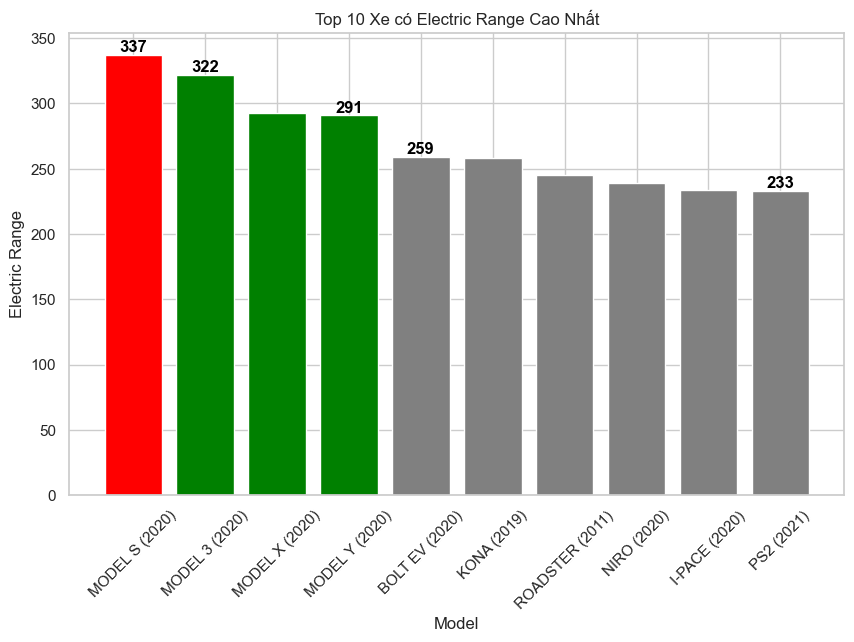

In [37]:
colors = ['red', 'green', 'green', 'green', 'gray', 'gray', 'gray', 'gray','gray', 'gray']

# Vẽ biểu đồ cột với màu sắc tùy chỉnh
fig, ax = plt.subplots(figsize=(10, 6))

# Kết hợp thông tin từ hai cột 'Model' và 'Model Year'
model_years = [f"{model} ({year})" for model, year in zip(top_models['Model'], top_models['Model Year'])]

# Vẽ các cột
bars = plt.bar(model_years, top_models['Electric Range'], color=colors)
plt.xlabel('Model')
plt.ylabel('Electric Range')
plt.title('Top 10 Xe có Electric Range Cao Nhất')
plt.xticks(rotation=45)

# Hiển thị giá trị của các cột đầu tiên, cột thứ 3, cột thứ 5 và cột thứ 10
for i, bar in enumerate(bars):
    if i in [0, 1, 3, 4 , 9]:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontweight='bold')

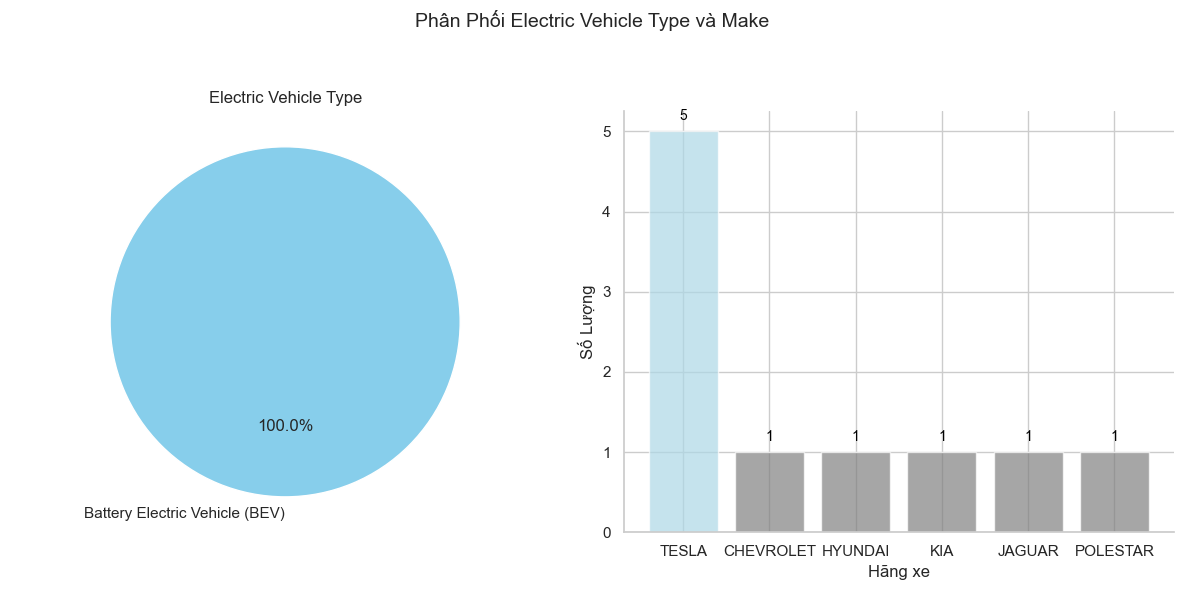

In [38]:
electric_vehicle_type_counts = top_models['Electric Vehicle Type'].value_counts()

# Tính số lượng các xe theo Make
make_counts = top_models['Make'].value_counts()
# Tạo figure với 2 subplots (nhỏ hơn)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Biểu đồ Electric Vehicle Type (Pie Chart)
ax1.pie(electric_vehicle_type_counts, labels=electric_vehicle_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'yellow', 'lightcoral'])
ax1.axis('equal')
ax1.set_title('Electric Vehicle Type', fontsize=12)

# Biểu đồ Make
colors = ['lightblue'] + ['grey'] * (len(make_counts) - 1)
ax2.bar(make_counts.index, make_counts.values, color=colors, alpha=0.7, label='Make')
ax2.set_xlabel('Hãng xe', fontsize=12)
ax2.set_ylabel('Số Lượng', fontsize=12)
ax2.tick_params(axis='y')

for i, v in enumerate(make_counts.values):
    ax2.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10, color='black')

# Loại bỏ khung xung quanh biểu đồ
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Tiêu đề biểu đồ
plt.suptitle('Phân Phối Electric Vehicle Type và Make', fontsize=14)

# Tăng khoảng cách giữa 2 biểu đồ
plt.tight_layout(rect=[0, 0, 1, 0.94])

# Hiển thị biểu đồ
plt.show()

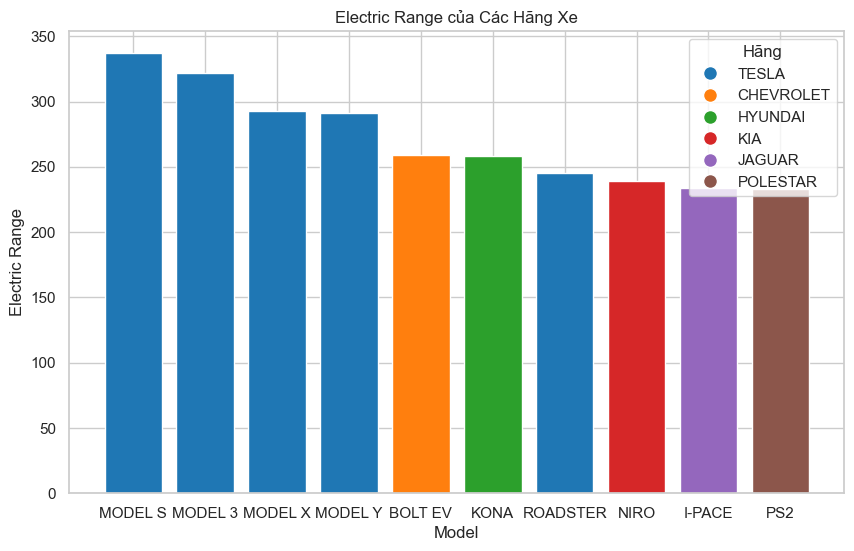

In [39]:
top_models = top_models.sort_values(by='Electric Range', ascending=False)

# Tạo một dictionary để lưu trữ màu của từng hãng
make_colors = {}

# Lặp qua danh sách và gán màu cho mỗi hãng
for index, model in top_models.iterrows():
    if model['Make'] not in make_colors:
        make_colors[model['Make']] = plt.cm.get_cmap('tab10')(len(make_colors))

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

# Đối với mỗi model, vẽ một cột tương ứng
for index, model in top_models.iterrows():
    ax.bar(model['Model'], model['Electric Range'], color=make_colors[model['Make']])

# Đặt tiêu đề và nhãn trục
ax.set_title('Electric Range của Các Hãng Xe')
ax.set_xlabel('Model')
ax.set_ylabel('Electric Range')

# Tạo một chú thích cho màu sắc hãng xe
handles = [plt.Line2D([0], [0], marker='o', color='w', label=make,
                      markersize=10, markerfacecolor=color) for make, color in make_colors.items()]
ax.legend(handles=handles, title='Hãng')

# Hiển thị biểu đồ
plt.show()

## Encoding

In [40]:
df = data[['Make', 'Model', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Model Year', 'Electric Vehicle Type']]

In [41]:
data_encoding_model = df.sort_values(by='Make')
encoder = OrdinalEncoder()
data_encoding_model['Model_encoded'] = encoder.fit_transform(data_encoding_model[['Model']])
data_encoding_model

,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Model Year,Electric Vehicle Type,Model_encoded
101079,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0
68236,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0
24796,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0
105849,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0
149599,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0
...,...,...,...,...,...,...
135607,VOLVO,XC90,Not eligible due to low battery range,2018,Plug-in Hybrid Electric Vehicle (PHEV),91.0
57942,VOLVO,XC60,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),90.0
135954,WHEEGO ELECTRIC CARS,WHEEGO,Clean Alternative Fuel Vehicle Eligible,2010,Plug-in Hybrid Electric Vehicle (PHEV),86.0
14077,WHEEGO ELECTRIC CARS,WHEEGO,Clean Alternative Fuel Vehicle Eligible,2010,Plug-in Hybrid Electric Vehicle (PHEV),86.0


In [42]:
model_counts = data_encoding_model.groupby('Model').size().reset_index(name='Count')
model_counts = model_counts.merge(data_encoding_model[['Model', 'Model_encoded']].drop_duplicates(), on='Model')
model_counts = model_counts.sort_values(by='Model_encoded', ascending=True)
make_one_hot_encoded_make = pd.get_dummies(data_encoding_model['Make'], prefix='Make')
data_encoded = pd.concat([data_encoding_model, make_one_hot_encoded_make], axis=1)
data_encoded

,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Model Year,Electric Vehicle Type,Model_encoded,Make_ALFA ROMEO,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,...,Make_POLESTAR,Make_PORSCHE,Make_SMART,Make_SUBARU,Make_TESLA,Make_TH!NK,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Make_WHEEGO ELECTRIC CARS
101079,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68236,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24796,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105849,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149599,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135607,VOLVO,XC90,Not eligible due to low battery range,2018,Plug-in Hybrid Electric Vehicle (PHEV),91.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
57942,VOLVO,XC60,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),90.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
135954,WHEEGO ELECTRIC CARS,WHEEGO,Clean Alternative Fuel Vehicle Eligible,2010,Plug-in Hybrid Electric Vehicle (PHEV),86.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14077,WHEEGO ELECTRIC CARS,WHEEGO,Clean Alternative Fuel Vehicle Eligible,2010,Plug-in Hybrid Electric Vehicle (PHEV),86.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
data_encoded['CAFV_encoded'] = encoder.fit_transform(data_encoded[['Clean Alternative Fuel Vehicle (CAFV) Eligibility']])
data_encoded

,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Model Year,Electric Vehicle Type,Model_encoded,Make_ALFA ROMEO,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,...,Make_PORSCHE,Make_SMART,Make_SUBARU,Make_TESLA,Make_TH!NK,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Make_WHEEGO ELECTRIC CARS,CAFV_encoded
101079,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
68236,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
24796,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
105849,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
149599,ALFA ROMEO,TONALE,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135607,VOLVO,XC90,Not eligible due to low battery range,2018,Plug-in Hybrid Electric Vehicle (PHEV),91.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
57942,VOLVO,XC60,Clean Alternative Fuel Vehicle Eligible,2024,Plug-in Hybrid Electric Vehicle (PHEV),90.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
135954,WHEEGO ELECTRIC CARS,WHEEGO,Clean Alternative Fuel Vehicle Eligible,2010,Plug-in Hybrid Electric Vehicle (PHEV),86.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
14077,WHEEGO ELECTRIC CARS,WHEEGO,Clean Alternative Fuel Vehicle Eligible,2010,Plug-in Hybrid Electric Vehicle (PHEV),86.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0


In [44]:
cafv_counts = data_encoded.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility').size().reset_index(name='Count')
cafv_counts = cafv_counts.merge(data_encoded[['Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'CAFV_encoded']].drop_duplicates(), on='Clean Alternative Fuel Vehicle (CAFV) Eligibility')
cafv_counts = cafv_counts.sort_values(by='CAFV_encoded', ascending=True)
cafv_counts[['Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'CAFV_encoded']]

,Clean Alternative Fuel Vehicle (CAFV) Eligibility,CAFV_encoded
0,Clean Alternative Fuel Vehicle Eligible,0.0
1,Not eligible due to low battery range,1.0


In [45]:
data_encoded.drop(['Make', 'Model', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'], axis = 1, inplace = True)
data_encoded

,Model Year,Electric Vehicle Type,Model_encoded,Make_ALFA ROMEO,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_CADILLAC,Make_CHEVROLET,...,Make_PORSCHE,Make_SMART,Make_SUBARU,Make_TESLA,Make_TH!NK,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Make_WHEEGO ELECTRIC CARS,CAFV_encoded
101079,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
68236,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
24796,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
105849,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
149599,2024,Plug-in Hybrid Electric Vehicle (PHEV),81.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135607,2018,Plug-in Hybrid Electric Vehicle (PHEV),91.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
57942,2024,Plug-in Hybrid Electric Vehicle (PHEV),90.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
135954,2010,Plug-in Hybrid Electric Vehicle (PHEV),86.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
14077,2010,Plug-in Hybrid Electric Vehicle (PHEV),86.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0


### Save df

In [46]:
data_encoded.to_csv('PCA_data.csv', index=False)
df = pd.read_csv('PCA_data.csv')

## PCA

In [47]:
target = 'Electric Vehicle Type'
print('* Biến phân lớp:', target)
features = [col for col in df.columns if col != target]  
nb_features = len(features)  
print('* Số lượng features = %2d' % nb_features)
print('  Các features:', ', '.join(features))

* Biến phân lớp: Electric Vehicle Type
* Số lượng features = 37
  Các features: Model Year, Model_encoded, Make_ALFA ROMEO, Make_AUDI, Make_AZURE DYNAMICS, Make_BENTLEY, Make_BMW, Make_CADILLAC, Make_CHEVROLET, Make_CHRYSLER, Make_FIAT, Make_FISKER, Make_FORD, Make_HONDA, Make_HYUNDAI, Make_JAGUAR, Make_JEEP, Make_KIA, Make_LAND ROVER, Make_LEXUS, Make_LINCOLN, Make_MAZDA, Make_MERCEDES-BENZ, Make_MINI, Make_MITSUBISHI, Make_NISSAN, Make_POLESTAR, Make_PORSCHE, Make_SMART, Make_SUBARU, Make_TESLA, Make_TH!NK, Make_TOYOTA, Make_VOLKSWAGEN, Make_VOLVO, Make_WHEEGO ELECTRIC CARS, CAFV_encoded


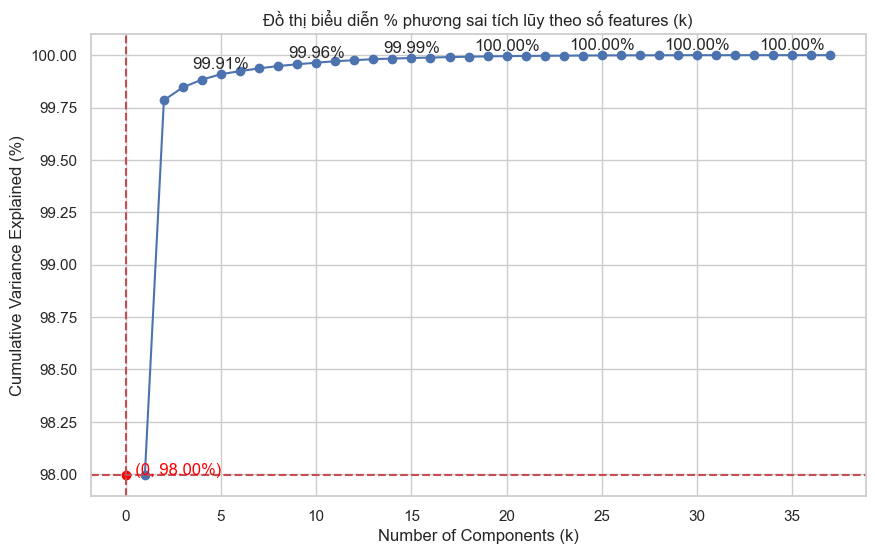

In [48]:
features = df.drop('Electric Vehicle Type', axis=1)
target = 'Electric Vehicle Type'

pca = PCA()
pca.fit(features)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100
x_values = np.arange(1, len(cumulative_variance) + 1)

plt.figure(figsize=(10, 6))
plt.plot(x_values, cumulative_variance, marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)')
plt.grid(True)
for k in range(5, len(cumulative_variance) + 1, 5):
    plt.text(k, cumulative_variance[k - 1] + 0.025, f'{cumulative_variance[k - 1]:.2f}%', ha='center')
elbow_point = np.argmax(cumulative_variance >= 95)  
plt.axvline(x=elbow_point, color='r', linestyle='--')
plt.axhline(y=cumulative_variance[elbow_point], color='r', linestyle='--')
plt.scatter(elbow_point, cumulative_variance[elbow_point], color='red')
plt.text(elbow_point, cumulative_variance[elbow_point], f'  ({elbow_point}, {cumulative_variance[elbow_point]:.2f}%)', color='red')

plt.show()

In [49]:
threshold = .9985
percent   = threshold * 100

pca = PCA(threshold)
pca.fit_transform(features) 

k   = pca.n_components_
var = sum(pca.explained_variance_ratio_) * 100
print('   * Muốn phương sai tích lũy >= %.2f%%' %percent, 'thì k >= %d' %k, '--> %.2f%%' %var, '\n')

   * Muốn phương sai tích lũy >= 99.85% thì k >= 4 --> 99.88% 



### After using PCA to k = 2

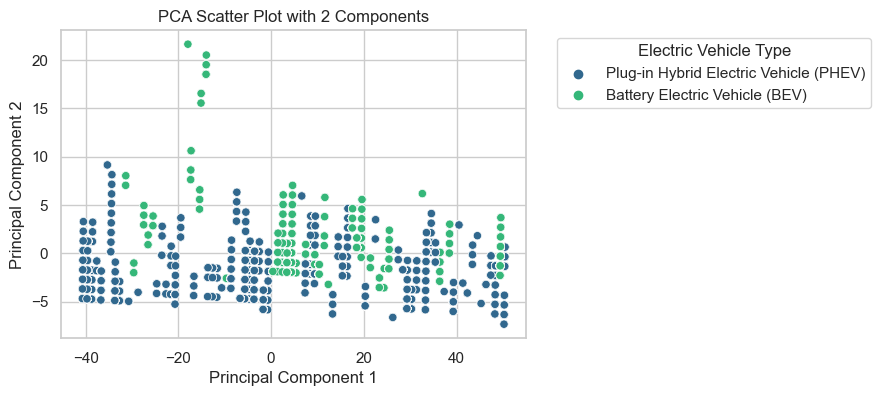

             PC1       PC2                   Electric Vehicle Type
0     -30.716972 -4.976268  Plug-in Hybrid Electric Vehicle (PHEV)
1     -30.716972 -4.976268  Plug-in Hybrid Electric Vehicle (PHEV)
2     -30.716972 -4.976268  Plug-in Hybrid Electric Vehicle (PHEV)
3     -30.716972 -4.976268  Plug-in Hybrid Electric Vehicle (PHEV)
4     -30.716972 -4.976268  Plug-in Hybrid Electric Vehicle (PHEV)
...          ...       ...                                     ...
80744 -40.543158  1.276601  Plug-in Hybrid Electric Vehicle (PHEV)
80745 -39.715652 -4.721490  Plug-in Hybrid Electric Vehicle (PHEV)
80746 -35.311043  9.140224  Plug-in Hybrid Electric Vehicle (PHEV)
80747 -35.311043  9.140224  Plug-in Hybrid Electric Vehicle (PHEV)
80748 -35.311043  9.140224  Plug-in Hybrid Electric Vehicle (PHEV)

[80749 rows x 3 columns]


In [50]:
pca_2d = PCA(n_components=2)
features_2d = pca_2d.fit_transform(features)

pca_df = pd.DataFrame(data=features_2d, columns=['PC1', 'PC2'])
pca_df[target] = df['Electric Vehicle Type']
plt.figure(figsize=(6, 4))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=target,
                palette='viridis')
plt.title('PCA Scatter Plot with 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
print(pca_df)

In [51]:
pca_4d = PCA(n_components=4)
features_4d = pca_4d.fit_transform(features)
pca_df_4 = pd.DataFrame(data=features_4d, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df_4[target] = df['Electric Vehicle Type']
print(pca_df_4)

             PC1       PC2       PC3       PC4  \
0     -30.716972 -4.976268 -0.026480 -0.406550   
1     -30.716972 -4.976268 -0.026480 -0.406550   
2     -30.716972 -4.976268 -0.026480 -0.406550   
3     -30.716972 -4.976268 -0.026480 -0.406550   
4     -30.716972 -4.976268 -0.026480 -0.406550   
...          ...       ...       ...       ...   
80744 -40.543158  1.276601  0.600124  0.509508   
80745 -39.715652 -4.721490 -0.004029 -0.368550   
80746 -35.311043  9.140224  0.053788  0.133835   
80747 -35.311043  9.140224  0.053788  0.133835   
80748 -35.311043  9.140224  0.053788  0.133835   

                        Electric Vehicle Type  
0      Plug-in Hybrid Electric Vehicle (PHEV)  
1      Plug-in Hybrid Electric Vehicle (PHEV)  
2      Plug-in Hybrid Electric Vehicle (PHEV)  
3      Plug-in Hybrid Electric Vehicle (PHEV)  
4      Plug-in Hybrid Electric Vehicle (PHEV)  
...                                       ...  
80744  Plug-in Hybrid Electric Vehicle (PHEV)  
80745  Plug-in 

## Prepare the Data

In [52]:
X = pca_df_4.drop('Electric Vehicle Type', axis=1)
y = pca_df_4['Electric Vehicle Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [53]:
X_train_shape = X_train.shape
X_test_shape = X_test.shape
y_train_shape = (len(y_train),)
y_test_shape = (len(y_test),)

X_train_shape, X_test_shape, y_train_shape, y_test_shape

((64599, 4), (16150, 4), (64599,), (16150,))

## Machine Learning

### SVM

In [54]:
svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print('-----------------------------------------Suport Vector Machine------------------------------------------------')
print(classification_report(y_test, y_pred))

-----------------------------------------Suport Vector Machine------------------------------------------------
                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       0.96      0.94      0.95      9276
Plug-in Hybrid Electric Vehicle (PHEV)       0.92      0.95      0.93      6874

                              accuracy                           0.94     16150
                             macro avg       0.94      0.94      0.94     16150
                          weighted avg       0.94      0.94      0.94     16150



### Confusion Matrix SVM

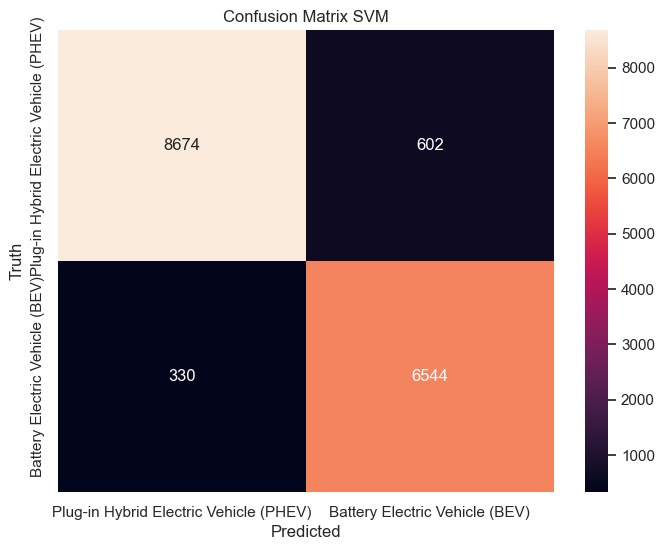

In [55]:
cm_svm = confusion_matrix(y_test, y_pred)
labels = y_test.unique()

plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix SVM')
plt.show()

### Decision Tree

In [57]:
tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print('-----------------------------------------Decision Tree------------------------------------------------')
print(classification_report(y_test, y_pred))

-----------------------------------------Decision Tree------------------------------------------------
                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       1.00      0.99      0.99      9276
Plug-in Hybrid Electric Vehicle (PHEV)       0.98      1.00      0.99      6874

                              accuracy                           0.99     16150
                             macro avg       0.99      0.99      0.99     16150
                          weighted avg       0.99      0.99      0.99     16150



### Confusion Matrix Tree Decision

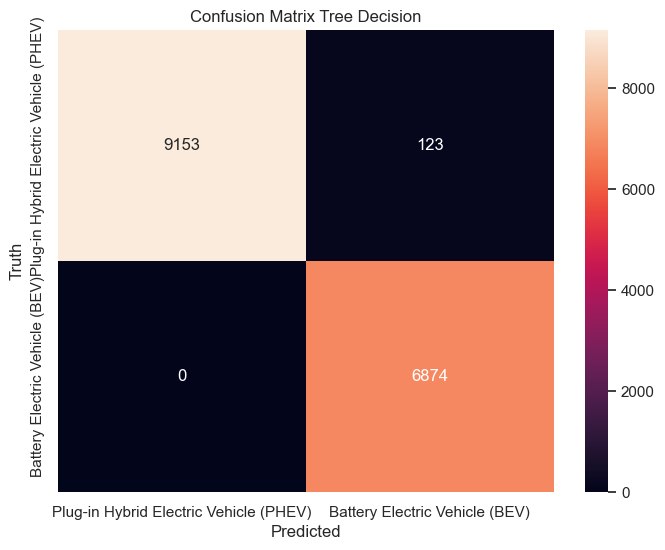

In [58]:
cm_td = confusion_matrix(y_test, y_pred)
labels = y_test.unique()

plt.figure(figsize=(8,6))
sns.heatmap(cm_td, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix Tree Decision')
plt.show()

### Logistic Regression

In [59]:
log_reg_model = LogisticRegression()

log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

print('-----------------------------------------Logistic Regression------------------------------------------------')
print(classification_report(y_test, y_pred))

-----------------------------------------Logistic Regression------------------------------------------------
                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       0.96      0.93      0.95      9276
Plug-in Hybrid Electric Vehicle (PHEV)       0.92      0.95      0.93      6874

                              accuracy                           0.94     16150
                             macro avg       0.94      0.94      0.94     16150
                          weighted avg       0.94      0.94      0.94     16150



### Confusion Matrix Logistic Regression

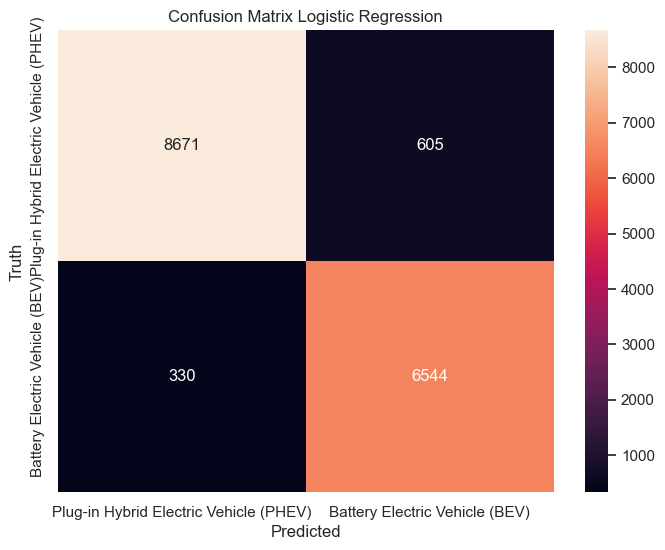

In [60]:
cm_lr = confusion_matrix(y_test, y_pred)
labels = y_test.unique()

plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

### K-Nearest Neighbors

In [61]:
knn_model = KNeighborsClassifier(n_neighbors=100)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print('-----------------------------------------K-Nearest Neighbors------------------------------------------------')
print(classification_report(y_test, y_pred))

-----------------------------------------K-Nearest Neighbors------------------------------------------------
                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       1.00      0.99      0.99      9276
Plug-in Hybrid Electric Vehicle (PHEV)       0.98      1.00      0.99      6874

                              accuracy                           0.99     16150
                             macro avg       0.99      0.99      0.99     16150
                          weighted avg       0.99      0.99      0.99     16150



### Confusion Matrix K-Nearest Neighbors

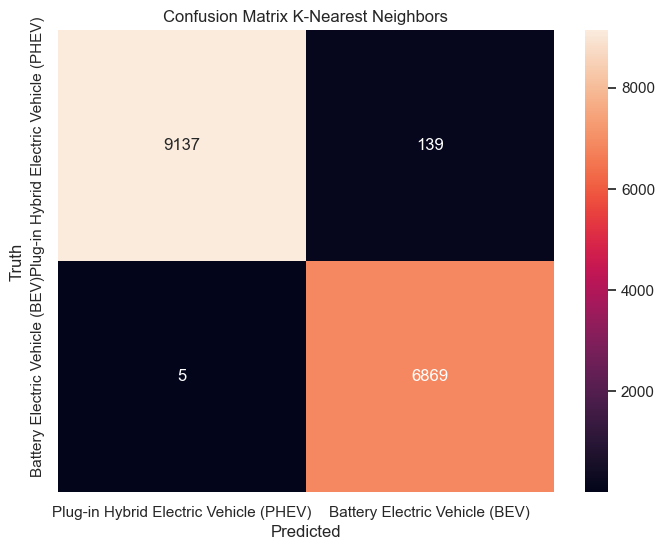

In [62]:
cm_knn = confusion_matrix(y_test, y_pred)
labels = y_test.unique()

plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix K-Nearest Neighbors')
plt.show()